In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [117]:
my_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359554.csv', sep=',', index_col=False, skiprows=61)
mq_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359466.csv', sep=',', index_col=False, skiprows=61)

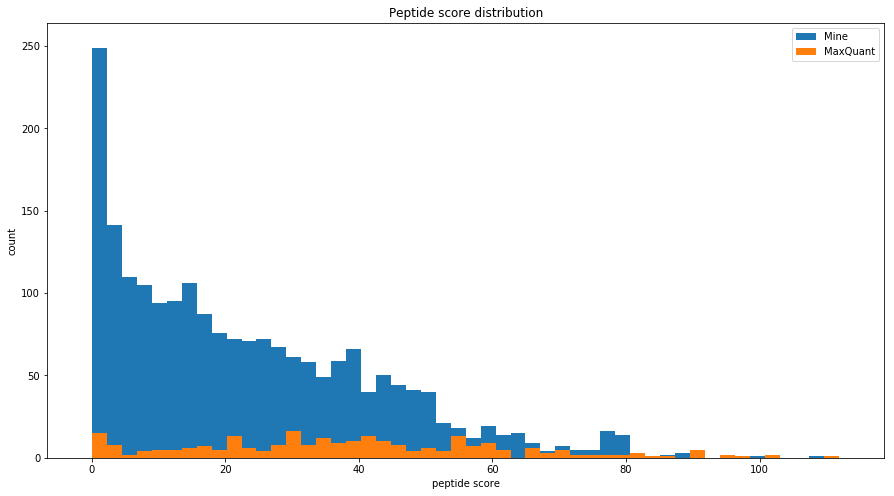

In [118]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score distribution')

bins = 50
hist, bins, _ = plt.hist(my_results_df.pep_score, bins=bins, label='Mine')
hist, bins, _ = plt.hist(mq_results_df.pep_score, bins=bins, label='MaxQuant')
plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('count')

plt.show()

In [119]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

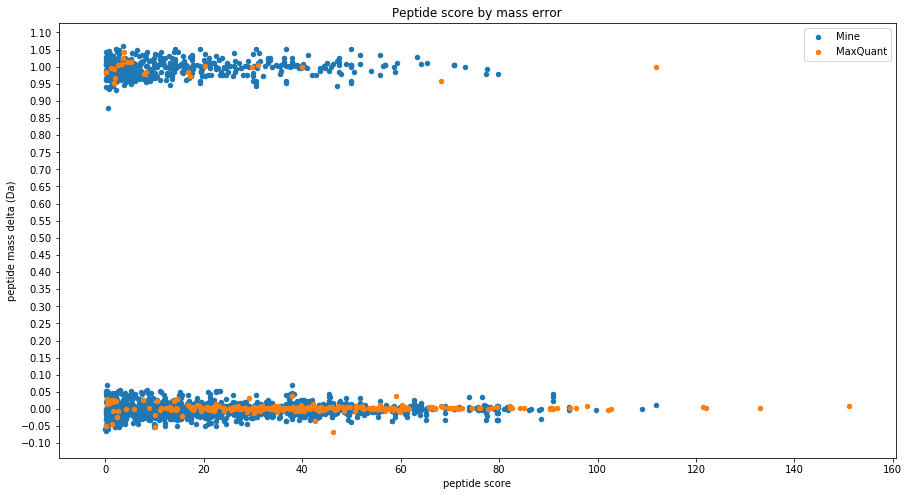

In [120]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score by mass error')

ax.scatter(my_results_df.pep_score, my_results_df.pep_delta, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")
ax.scatter(mq_results_df.pep_score, mq_results_df.pep_delta, marker='o', color=tableau20_mpl[2], lw=0, s=30, alpha=1.0, label="MaxQuant")

plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('peptide mass delta (Da)')
plt.yticks(np.arange(-0.1,1.1,0.05))

plt.show()

In [121]:
# number of peptide matches
my_peptides = list(my_results_df.pep_seq.unique())
mq_peptides = list(mq_results_df.pep_seq.unique())

In [122]:
intersection = len(set(mq_peptides).intersection(my_peptides))

In [123]:
print("my results had {} peptides, MQ had {} peptides, and there were {} in common".format(len(my_peptides), len(mq_peptides), intersection))

my results had 521 peptides, MQ had 221 peptides, and there were 174 in common


manually adjust for the wrong monoisotopic by subtracting the proton mass

In [145]:
PROTON_MASS = 1.0073
my_results_df['pep_delta_adj'] = my_results_df.pep_delta.apply(lambda x: (x-PROTON_MASS) if x > 0.5 else x)

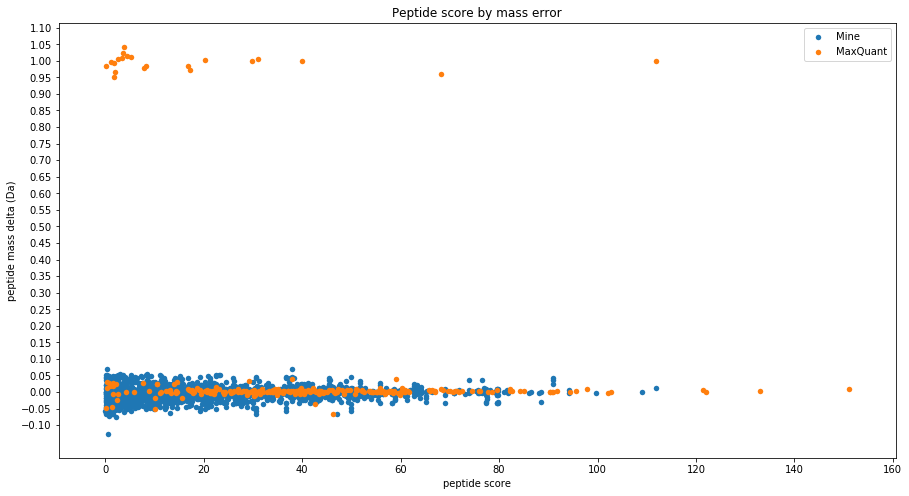

In [146]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score by mass error')

ax.scatter(my_results_df.pep_score, my_results_df.pep_delta_adj, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")
ax.scatter(mq_results_df.pep_score, mq_results_df.pep_delta, marker='o', color=tableau20_mpl[2], lw=0, s=30, alpha=1.0, label="MaxQuant")

plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('peptide mass delta (Da)')
plt.yticks(np.arange(-0.1,1.1,0.05))

plt.show()

In [191]:
my_results_df['pep_ppm'] = round((my_results_df.pep_delta_adj / my_results_df.pep_exp_mz) * 1e6).astype(int)

In [ ]:
hist, bins, _ = plt.hist(my_results_df.pep_score, bins=bins, label='Mine')

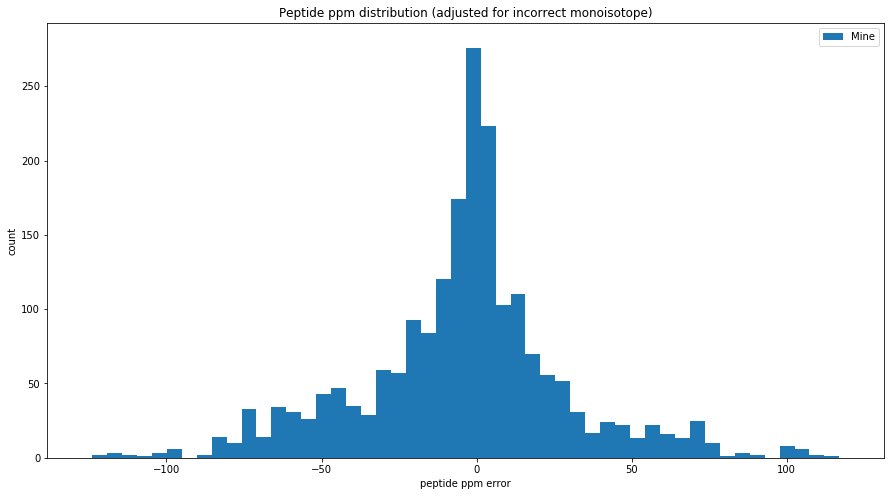

In [197]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide ppm distribution (adjusted for incorrect monoisotope)')

bins = 50
hist, bins, _ = plt.hist(my_results_df.pep_ppm, bins=bins, label='Mine')
plt.legend(loc='best')
plt.xlabel('peptide ppm error')
plt.ylabel('count')

plt.show()

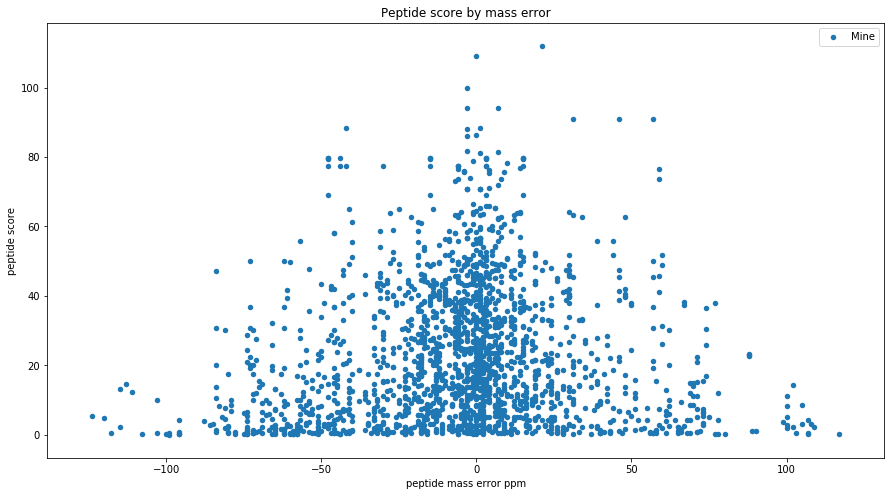

In [199]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score by mass error')

ax.scatter(my_results_df.pep_ppm, my_results_df.pep_score, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('peptide score')

plt.show()